In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/github/collegeproject/datasets/uniform_distribution_south_crops.csv")

In [3]:
df.columns

Index(['avg_year_temp', 'ph', 'rainfall', 'sowing_temp', 'harvesting_temp',
       'N', 'P', 'K', 'crop'],
      dtype='object')

In [4]:
df['crop'].unique()

array(['cowpea_lobia', 'arhar_tur', 'bajra', 'coriander', 'cotton_lint',
       'dry_chillies', 'gram', 'groundnut', 'jowar', 'maize_k', 'maize_r',
       'moong_green_gram', 'onion', 'potato', 'ragi', 'rice', 'sugarcane',
       'sunflower', 'turmeric', 'urad', 'wheat', 'linseed', 'safflower',
       'rapeseed_mustard'], dtype=object)

In [5]:
c=df.crop.astype('category')
targets = dict(enumerate(c.cat.categories))
df['crop']=c.cat.codes

In [6]:
targets.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [7]:
targets.values()

dict_values(['arhar_tur', 'bajra', 'coriander', 'cotton_lint', 'cowpea_lobia', 'dry_chillies', 'gram', 'groundnut', 'jowar', 'linseed', 'maize_k', 'maize_r', 'moong_green_gram', 'onion', 'potato', 'ragi', 'rapeseed_mustard', 'rice', 'safflower', 'sugarcane', 'sunflower', 'turmeric', 'urad', 'wheat'])

In [8]:
x=df.iloc[:,0:-1].values 
y=df.iloc[:,-1].values
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)


Inputs shape  (4344, 8)
Outputs shape  (4344,)


In [20]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test=tts(x,y,random_state=2022,test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# we must apply the scaling to the test set as well that we are computing for the training set
x_test = scaler.transform(x_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3475, 8)
(869, 8)
(3475,)
(869,)


In [21]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,24)
y_test=to_categorical(y_test,24)

In [22]:
print(y_train.shape)
print(y_test.shape)

(3475, 24)
(869, 24)


In [29]:
from keras.models import Sequential  #Models->Layers->modules 
from keras.layers import Dense       #Keras is a wrapper to tenorflow as a book
input_size=8
output_size=24
ann_model=Sequential()
ann_model.add(Dense(units=64,activation='sigmoid',input_shape=(input_size,)))
ann_model.add(Dense(units=output_size,activation='softmax'))

In [30]:
ann_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 24)                1560      
                                                                 
Total params: 2,136
Trainable params: 2,136
Non-trainable params: 0
_________________________________________________________________


In [31]:
ann_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['categorical_accuracy'],
                  steps_per_execution=10)
#Here we are configuring/assigning parameters of the model for training

In [33]:
#below block code is throwing some error due to mismatch so need to run this code
tf.config.experimental_run_functions_eagerly(True)

In [34]:
model_results=ann_model.fit(x_train,y_train,
              epochs=20,
              batch_size=30,
              validation_split=0.2)

Epoch 1/20
93/93 [==============================] - 7s 79ms/step - loss: 3.0516 - categorical_accuracy: 0.2173 - val_loss: 2.8685 - val_categorical_accuracy: 0.3755
Epoch 2/20
93/93 [==============================] - 4s 41ms/step - loss: 2.7145 - categorical_accuracy: 0.4629 - val_loss: 2.5538 - val_categorical_accuracy: 0.5511
Epoch 3/20
93/93 [==============================] - 2s 26ms/step - loss: 2.3853 - categorical_accuracy: 0.6194 - val_loss: 2.2152 - val_categorical_accuracy: 0.6388
Epoch 4/20
93/93 [==============================] - 2s 26ms/step - loss: 2.0469 - categorical_accuracy: 0.7094 - val_loss: 1.8789 - val_categorical_accuracy: 0.7784
Epoch 5/20
93/93 [==============================] - 3s 37ms/step - loss: 1.7278 - categorical_accuracy: 0.8108 - val_loss: 1.5719 - val_categorical_accuracy: 0.8504
Epoch 6/20
93/93 [==============================] - 3s 30ms/step - loss: 1.4505 - categorical_accuracy: 0.8953 - val_loss: 1.3161 - val_categorical_accuracy: 0.8993
Epoch 7/20

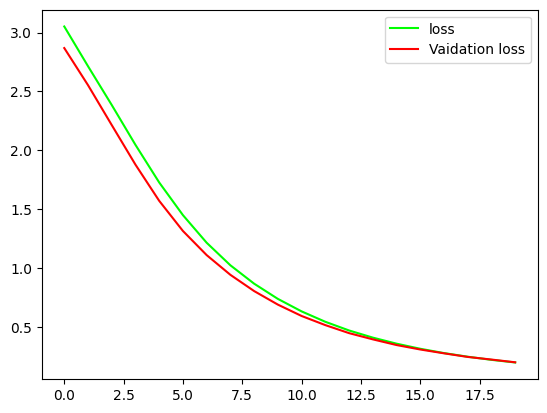

In [35]:
plt.plot(model_results.history['loss'],color="#00ff00",label="loss")
plt.plot(model_results.history['val_loss'],color="#ff0000",label="Vaidation loss")
plt.legend() #adds axis label
plt.show()

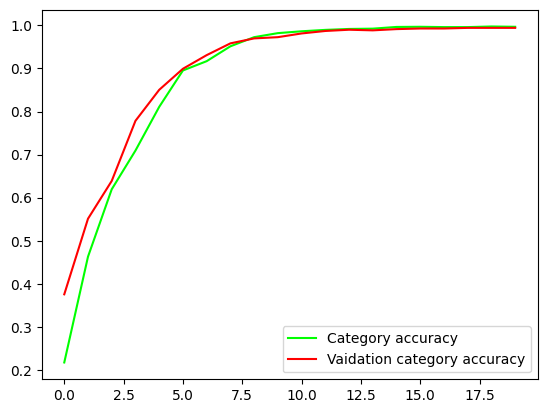

In [36]:
plt.plot(model_results.history['categorical_accuracy'],color="#00ff00",label="Category accuracy")
plt.plot(model_results.history['val_categorical_accuracy'],color="#ff0000",label="Vaidation category accuracy")
plt.legend() #adds axis label
plt.show()

In [37]:
import pickle
#saving the model
pickle.dump(ann_model, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/ann.pkl", "wb"))

In [38]:
# function to return key for any value 
def get_key(val): 
    for key, value in targets.items(): 
         if (val == key): 
             return value 

In [39]:
targets

{0: 'arhar_tur',
 1: 'bajra',
 2: 'coriander',
 3: 'cotton_lint',
 4: 'cowpea_lobia',
 5: 'dry_chillies',
 6: 'gram',
 7: 'groundnut',
 8: 'jowar',
 9: 'linseed',
 10: 'maize_k',
 11: 'maize_r',
 12: 'moong_green_gram',
 13: 'onion',
 14: 'potato',
 15: 'ragi',
 16: 'rapeseed_mustard',
 17: 'rice',
 18: 'safflower',
 19: 'sugarcane',
 20: 'sunflower',
 21: 'turmeric',
 22: 'urad',
 23: 'wheat'}

In [40]:
for key,value in targets.items():
   print(key)      #Output: message
   print(value)

0
arhar_tur
1
bajra
2
coriander
3
cotton_lint
4
cowpea_lobia
5
dry_chillies
6
gram
7
groundnut
8
jowar
9
linseed
10
maize_k
11
maize_r
12
moong_green_gram
13
onion
14
potato
15
ragi
16
rapeseed_mustard
17
rice
18
safflower
19
sugarcane
20
sunflower
21
turmeric
22
urad
23
wheat


In [41]:
print(type(y_test[0][0]))

<class 'numpy.float32'>


In [47]:

loaded_model=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/ann.pkl','rb'))
loaded_scale=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/scale.pkl','rb'))
data =loaded_scale.transform( np.array([[	25.499573,	7.405498	,298.897352	,30.325860	,21.564118,	9.228892,	10.670175,	10.100367	]]))
prediction = loaded_model.predict(data)[0]

top3_indices = np.argsort(prediction)[-3:]
top3_codes = [get_key(idx) for idx in top3_indices]
top3_predictions = [prediction[idx] for idx in top3_indices]

print("Top 3 codes:", top3_codes)
print("Top 3 predictions:", top3_predictions)

code = np.argmax(prediction)
accuracy = np.max(prediction) * 100
print("Code is", code, "with accuracy", accuracy, "%")

1/1 [==============================] - 0s 48ms/step
Top 3 codes: ['maize_r', 'ragi', 'turmeric']
Top 3 predictions: [0.0064528687, 0.009038818, 0.9777535]
Code is 21 with accuracy 97.77535200119019 %


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

y_pred_ann = np.round(loaded_model.predict(x_test)).astype(int)

print('Results for ann Model')

matrix_plot=confusion_matrix(y_test, y_pred_ann)
# disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
#                              display_labels=bnb.classes_)
# disp.plot()

print(classification_report(y_test, y_pred_ann))


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/github/collegeproject/datasets/uniform_distribution_south_crops.csv")
c = df.crop.astype('category')
targets = dict(enumerate(c.cat.categories))
df['crop'] = c.cat.codes

# Split the data into training and testing sets
x = df.drop('crop', axis=1).values
y = df['crop'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2022, test_size=0.2)

# Standardize the training and testing data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert y_train and y_test to categorical format
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the neural network model
input_size = x_train.shape[1]
output_size = num_classes
ann_model = Sequential()
ann_model.add(Dense(units=64, activation='sigmoid', input_shape=(input_size,)))
ann_model.add(Dense(units=output_size, activation='softmax'))

# Compile the model
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Train the model
model_results = ann_model.fit(x_train, y_train, epochs=20, batch_size=30, validation_split=0.2)

# Make predictions on the test data and convert them to categorical format
y_pred_ann = ann_model.predict(x_test)
y_pred_ann = np.argmax(y_pred_ann, axis=1)
y_test = np.argmax(y_test, axis=1)

# Generate the confusion matrix and classification report
matrix_plot = confusion_matrix(y_test, y_pred_ann)
print('Confusion Matrix:\n', matrix_plot)
print('Classification Report:\n', classification_report(y_test, y_pred_ann))

pickle.dump(ann_model, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/ann_w_report.pkl", "wb"))

Epoch 1/20
 4/93 [>.............................] - ETA: 2s - loss: 3.1757 - categorical_accuracy: 0.1000

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


93/93 [==============================] - 3s 29ms/step - loss: 3.0341 - categorical_accuracy: 0.1867 - val_loss: 2.8605 - val_categorical_accuracy: 0.3885
Epoch 2/20
93/93 [==============================] - 4s 41ms/step - loss: 2.6928 - categorical_accuracy: 0.5212 - val_loss: 2.5219 - val_categorical_accuracy: 0.6719
Epoch 3/20
93/93 [==============================] - 4s 43ms/step - loss: 2.3550 - categorical_accuracy: 0.6313 - val_loss: 2.1769 - val_categorical_accuracy: 0.7338
Epoch 4/20
93/93 [==============================] - 3s 29ms/step - loss: 2.0118 - categorical_accuracy: 0.7547 - val_loss: 1.8452 - val_categorical_accuracy: 0.8201
Epoch 5/20
93/93 [==============================] - 3s 28ms/step - loss: 1.6977 - categorical_accuracy: 0.8644 - val_loss: 1.5502 - val_categorical_accuracy: 0.8576
Epoch 6/20
93/93 [==============================] - 3s 28ms/step - loss: 1.4291 - categorical_accuracy: 0.9115 - val_loss: 1.3006 - val_categorical_accuracy: 0.9094
Epoch 7/20
93/93 [===